# Individual Project

## Imports

In [1]:
# standard imports
import pandas as pd
import numpy as np

# this is to open the dataset/download the keggal dataset
import opendatasets as od
import os

# time imports
from datetime import timedelta, datetime

# sklearn imports
from scipy.stats import pearsonr, spearmanr, f_oneway, ttest_ind
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# visualized your data
import matplotlib.pyplot as plt
import seaborn as sns

# my imports
import wrangle as w
import explore as e
import modeling as m

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Acquire
- Data acquired from [Kaggle](https://gist.githubusercontent.com/rosendo-lugo/8138692acade48da91cf1c80687f0779/raw/american_bankruptcy.csv)
- Created a Github Gists link to provide a simple way of downloading the file.
    Downloaded .csv file: american_bankruptcy.csv
- It contained 78,682 rows and 21 columns before cleaning
    - 73,462 rows were alive
    - 5,220 rows were failed
- The dataset covers the period from 1999 to 2018 and includes accounting data from 8,262 distinct companies.
- Each row represents company status by year
- Each column represents financial indicators of these companies

## Prepare
- Did not remove any columns
- Did rename all X(num) columns to the appropiate name
- Checked for nulls - no null values found and created a columns for missing percentage
- Checked for unique values - created a columns in the summary dataframe to show the unique values
- Checked that column data types were appropriate
- Outliers: No outliers were removed
- Map categorical variables
- Split data into train, validate, and test (60/20/20)
- Scaled continuous variables

## Data Dictionary

| Variable Name            | Description                                                                                                     |
|--------------------------|--------------------------------------------------------------------------------------------------------|
| X1                       | Current assets - All the assets of a company that are expected to be sold or used as a result of standard business operations over the next year. |
| X2                       | Cost of goods sold - The total amount a company paid as a cost directly related to the sale of products.                                                        |
| X3                       | Depreciation and amortization - Depreciation refers to the loss of value of a tangible fixed asset over time (such as property, machinery, buildings, and plant). Amortization refers to the loss of value of intangible assets over time.  |
| X4                       | EBITDA - Earnings before interest, taxes, depreciation, and amortization. It is a measure of a company's overall financial performance, serving as an alternative to net income. |
| X5                       | Inventory - The accounting of items and raw materials that a company either uses in production or sells.                                                       |
| X6                       | Net Income - The overall profitability of a company after all expenses and costs have been deducted from total revenue.                                        |
| X7                       | Total Receivables - The balance of money due to a firm for goods or services delivered or used but not yet paid for by customers.                                |
| X8                       | Market value - The price of an asset in a marketplace. In this dataset, it refers to the market capitalization since companies are publicly traded in the stock market. |
| X9                       | Net sales - The sum of a company's gross sales minus its returns, allowances, and discounts.                                                                       |
| X10                      | Total assets - All the assets, or items of value, a business owns.                                                                                                 |
| X11                      | Total Long-term debt - A company's loans and other liabilities that will not become due within one year of the balance sheet date.                               |
| X12                      | EBIT - Earnings before interest and taxes.                                                                                                                         |
| X13                      | Gross Profit - The profit a business makes after subtracting all the costs that are related to manufacturing and selling its products or services.               |
| X14                      | Total Current Liabilities - The sum of accounts payable, accrued liabilities, and taxes such as Bonds payable at the end of the year, salaries, and commissions remaining.       |
| X15                      | Retained Earnings - The amount of profit a company has left over after paying all its direct costs, indirect costs, income taxes, and its dividends to shareholders. |
| X16                      | Total Revenue - The amount of income that a business has made from all sales before subtracting expenses. It may include interest and dividends from investments.     |
| X17                      | Total Liabilities - The combined debts and obligations that the company owes to outside parties.                                                                   |
| X18                      | Total Operating Expenses - The expenses a business incurs through its normal business operations.                                                                   |


In [2]:
url = 'https://gist.githubusercontent.com/rosendo-lugo/8138692acade48da91cf1c80687f0779/raw/american_bankruptcy.csv'

In [3]:
df = pd.read_csv(url)

## A summary of the data

In [4]:
w.data_summary(df)

data shape: (78682, 21)


,data type,#missing,%missing,#unique,count,mean,std,min,25%,50%,75%,max
company_name,object,0,0.0,8971,78682,NaN,NaN,NaN,NaN,NaN,NaN,NaN
status_label,object,0,0.0,2,78682,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,int64,0,0.0,20,78682.0,2007.506317,5.742768,1999.0,2002.0,2007.0,2012.0,2018.0
x1,float64,0,0.0,65895,78682.0,880.362485,3928.564794,-7.76,18.924,100.4495,431.52675,169662.0
x2,float64,0,0.0,65690,78682.0,1594.529029,8930.484664,-366.645,17.03825,103.661,634.548,374623.0
x3,float64,0,0.0,36010,78682.0,121.234256,652.376804,0.0,1.192,7.9295,47.97175,28430.0
x4,float64,0,0.0,59060,78682.0,376.759424,2012.023142,-21913.0,-0.811,15.0345,139.65525,81730.0
x5,float64,0,0.0,38898,78682.0,201.605717,1060.766096,0.0,0.0,7.023,74.74725,62567.0
x6,float64,0,0.0,55550,78682.0,129.382453,1265.532022,-98696.0,-7.41575,1.616,40.14425,104821.0
x7,float64,0,0.0,49577,78682.0,286.832743,1335.978571,-0.006,3.28125,22.82,131.5805,65812.0


## Prepare the DATA

In [5]:
df = w.prep_data(df)

In [6]:
df

,company_name,status_label,year,current_assets,cost_of_goods_sold,depreciation_and_amortization,ebitda,inventory,net_income,total_receivables,...,net_sales,total_assets,total_long_term_debt,ebit,gross_profit,total_current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operating_expenses
0,C_1,1,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,1,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,1,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,1,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,1,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,C_8971,1,2014,233.211,43.338,14.094,45.615,3.376,25.261,22.846,...,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608
78678,C_8971,1,2015,105.559,59.184,42.592,202.133,2.288,129.688,54.611,...,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020
78679,C_8971,1,2016,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,...,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807
78680,C_8971,1,2017,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,...,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713


In [7]:
target = 'status_label'

In [8]:
tr, val, ts = w.get_split(df)

In [9]:
tr

,status_label,current_assets,cost_of_goods_sold,depreciation_and_amortization,ebitda,inventory,net_income,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,ebit,gross_profit,total_current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operating_expenses
1943,1,4.743,9.946,0.250,0.079,0.575,-0.423,1.354,3.9273,13.335,8.067,0.835,-0.171,3.389,3.233,-22.017,13.335,4.243,13.256
30724,1,663.290,871.105,19.208,71.501,38.662,36.607,199.482,867.9888,1125.295,929.481,120.274,52.293,254.190,298.861,-37.344,1125.295,427.021,1053.794
66630,0,20.659,6.439,0.789,-2.516,0.192,-3.848,3.645,150.4777,3.923,99.810,23.683,-3.305,-2.516,25.671,-16.064,3.923,49.540,6.439
4934,1,456.824,2367.470,72.390,330.789,153.058,163.903,18.050,3641.7146,2842.284,1576.208,400.000,258.399,474.814,445.611,481.962,2842.284,1037.940,2511.495
9583,1,6.415,7.453,0.398,-0.396,1.042,-0.076,1.777,14.4224,14.586,9.205,0.000,-0.794,7.133,2.206,-12.860,14.586,2.627,14.982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44566,1,7.943,29.816,0.520,-3.097,1.062,-6.181,6.420,8.3214,36.467,11.775,1.113,-3.617,6.651,11.179,-26.874,36.467,12.334,39.564
6368,1,10.792,2.890,0.313,0.223,1.515,0.202,0.836,11.7502,7.087,13.058,0.000,-0.090,4.197,0.543,10.028,7.087,0.738,6.864
22808,0,432.893,477.321,95.493,-5.870,71.426,-129.704,133.166,232.5281,961.748,649.854,291.956,-101.363,484.427,431.404,-1625.974,961.748,814.745,967.618
38518,1,24.012,21.377,2.145,1.957,6.838,-5.827,7.979,48.0909,47.517,47.915,5.873,-0.188,26.140,9.020,-219.101,47.517,15.457,45.560


In [10]:
X_tr, X_val, X_ts, y_tr, y_val, y_ts, to_scale, baseline = w.get_Xs_ys_to_scale_baseline(tr, val, ts, target)

In [11]:
X_tr

,current_assets,cost_of_goods_sold,depreciation_and_amortization,ebitda,inventory,net_income,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,ebit,gross_profit,total_current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operating_expenses
1943,4.743,9.946,0.250,0.079,0.575,-0.423,1.354,3.9273,13.335,8.067,0.835,-0.171,3.389,3.233,-22.017,13.335,4.243,13.256
30724,663.290,871.105,19.208,71.501,38.662,36.607,199.482,867.9888,1125.295,929.481,120.274,52.293,254.190,298.861,-37.344,1125.295,427.021,1053.794
66630,20.659,6.439,0.789,-2.516,0.192,-3.848,3.645,150.4777,3.923,99.810,23.683,-3.305,-2.516,25.671,-16.064,3.923,49.540,6.439
4934,456.824,2367.470,72.390,330.789,153.058,163.903,18.050,3641.7146,2842.284,1576.208,400.000,258.399,474.814,445.611,481.962,2842.284,1037.940,2511.495
9583,6.415,7.453,0.398,-0.396,1.042,-0.076,1.777,14.4224,14.586,9.205,0.000,-0.794,7.133,2.206,-12.860,14.586,2.627,14.982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44566,7.943,29.816,0.520,-3.097,1.062,-6.181,6.420,8.3214,36.467,11.775,1.113,-3.617,6.651,11.179,-26.874,36.467,12.334,39.564
6368,10.792,2.890,0.313,0.223,1.515,0.202,0.836,11.7502,7.087,13.058,0.000,-0.090,4.197,0.543,10.028,7.087,0.738,6.864
22808,432.893,477.321,95.493,-5.870,71.426,-129.704,133.166,232.5281,961.748,649.854,291.956,-101.363,484.427,431.404,-1625.974,961.748,814.745,967.618
38518,24.012,21.377,2.145,1.957,6.838,-5.827,7.979,48.0909,47.517,47.915,5.873,-0.188,26.140,9.020,-219.101,47.517,15.457,45.560


In [12]:
X_tr_sc, X_val_sc, X_ts_sc = w.scale_data(X_tr,X_val,X_ts,to_scale)

In [13]:
X_tr_sc

,current_assets,cost_of_goods_sold,depreciation_and_amortization,ebitda,inventory,net_income,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,ebit,gross_profit,total_current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operating_expenses
1943,-0.228070,-0.177569,-0.184701,-0.187364,-0.190554,-0.111164,-0.214206,-0.189922,-0.196531,-0.221456,-0.224594,-0.171332,-0.202421,-0.206354,-0.087099,-0.196531,-0.220325,-0.188603
30724,-0.054353,-0.080464,-0.155644,-0.151640,-0.154424,-0.080197,-0.065524,-0.141616,-0.102994,-0.149648,-0.187151,-0.135955,-0.135763,-0.105681,-0.089558,-0.102994,-0.167501,-0.088565
66630,-0.223871,-0.177965,-0.183875,-0.188662,-0.190918,-0.114028,-0.212487,-0.181729,-0.197323,-0.214307,-0.217431,-0.173445,-0.203990,-0.198713,-0.086143,-0.197323,-0.214665,-0.189258
4934,-0.108816,0.088269,-0.074130,-0.021951,-0.045903,0.026255,-0.201677,0.013453,0.041438,-0.099247,-0.099461,0.003021,-0.077126,-0.055706,-0.006235,0.041438,-0.091170,0.051578
9583,-0.227629,-0.177851,-0.184474,-0.187602,-0.190111,-0.110873,-0.213888,-0.189335,-0.196426,-0.221368,-0.224855,-0.171752,-0.201426,-0.206704,-0.085629,-0.196426,-0.220527,-0.188437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44566,-0.227226,-0.175329,-0.184287,-0.188953,-0.190092,-0.115979,-0.210404,-0.189676,-0.194585,-0.221167,-0.224506,-0.173655,-0.201554,-0.203648,-0.087878,-0.194585,-0.219314,-0.186073
6368,-0.226474,-0.178365,-0.184604,-0.187292,-0.189663,-0.110641,-0.214595,-0.189485,-0.197057,-0.221067,-0.224855,-0.171277,-0.202206,-0.207270,-0.081957,-0.197057,-0.220763,-0.189217
22808,-0.115129,-0.124867,-0.038720,-0.190340,-0.123342,-0.219276,-0.115290,-0.177142,-0.116751,-0.171440,-0.133331,-0.239565,-0.074571,-0.060544,-0.344454,-0.116751,-0.119057,-0.096850
38518,-0.222987,-0.176281,-0.181796,-0.186425,-0.184613,-0.115683,-0.209234,-0.187453,-0.193656,-0.218351,-0.223014,-0.171343,-0.196374,-0.204383,-0.118721,-0.193656,-0.218924,-0.185497


# Explore

### What is the distribution of the target?

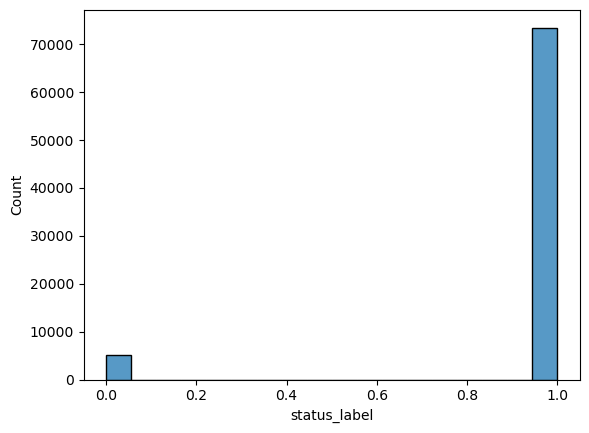

In [14]:
# get a histplot of quality
sns.histplot(df.status_label)
plt.show()

### Pair Plot

In [15]:
# sns.pairplot(df)

### Histplot

In [16]:
# plt.figure(figsize=(14,38))
# plt.xticks(rotation = 45)
# for i, col in enumerate(df):
#     plt.subplot(7,3,i+1)
#     sns.histplot(df[col])
# plt.show()

In [17]:
# list_col = list(df.columns)

In [18]:
# # perform a plot distribution of all the features
# for col in list_col[2:]:
#     print(col)
#     plt.hist(df[col])
#     plt.show()

In [19]:
# # perform a plot distribution of all the features
# for col in list_col[2:]:                           
#     print(col)
#     plt.boxplot(df[col])
#     plt.show()

## Correlation Matrix

In [ ]:
list_col = list(df.columns)
data = df[list_col[3:]]
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Pearson Correlation Matrix')

plt.show()

In [33]:
df.head().T

,0,1,2,3,4
company_name,C_1,C_1,C_1,C_1,C_1
status_label,1,1,1,1,1
year,1999,2000,2001,2002,2003
current_assets,511.267,485.856,436.656,396.412,432.204
cost_of_goods_sold,833.107,713.811,526.477,496.747,523.302
depreciation_and_amortization,18.373,18.577,22.496,27.172,26.68
ebitda,89.031,64.367,27.207,30.745,47.491
inventory,336.018,320.59,286.588,259.954,247.245
net_income,35.163,18.531,-58.939,-12.41,3.504
total_receivables,128.348,115.187,77.528,66.322,104.661


In [22]:
# e.get_spearmanr_regplots(df, 'status_label')

In [23]:
object_cols = e.get_object_cols(df)

In [24]:
num_cols = e.get_numeric_cols(df)

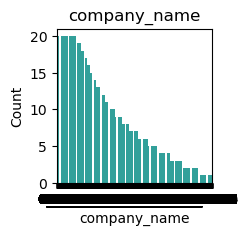

       company_name  Count  Percent
C_4081          C_1     20     0.03
C_6487          C_2     20     0.03
C_1153          C_3     20     0.03
C_4047          C_4     20     0.03
C_4056          C_5     20     0.03
...             ...    ...      ...
C_1498       C_8967      1     0.00
C_5908       C_8968      1     0.00
C_2814       C_8969      1     0.00
C_3997       C_8970      1     0.00
C_3408       C_8971      1     0.00

[8971 rows x 3 columns]
______________________________________________________________________________________


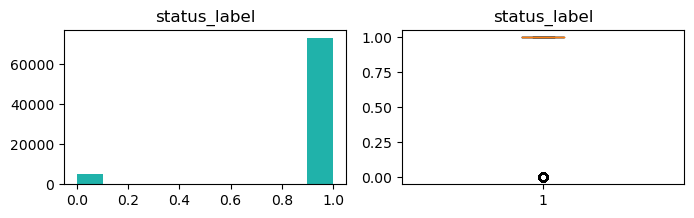

count    78682.000000
mean         0.933657
std          0.248882
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: status_label, dtype: float64
______________________________________________________________________________________


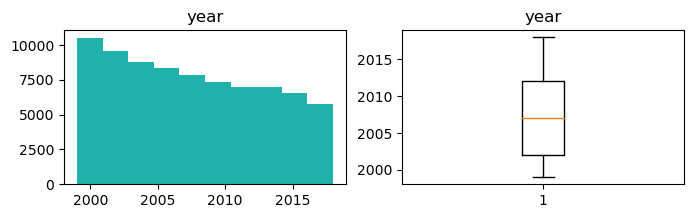

count    78682.000000
mean      2007.506317
std          5.742768
min       1999.000000
25%       2002.000000
50%       2007.000000
75%       2012.000000
max       2018.000000
Name: year, dtype: float64
______________________________________________________________________________________


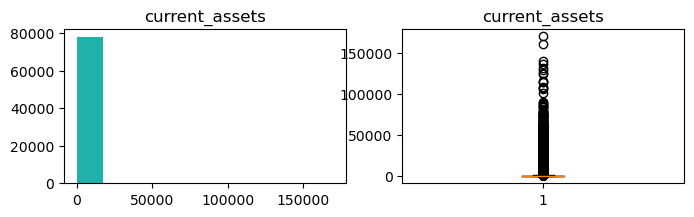

count     78682.000000
mean        880.362485
std        3928.564794
min          -7.760000
25%          18.924000
50%         100.449500
75%         431.526750
max      169662.000000
Name: current_assets, dtype: float64
______________________________________________________________________________________


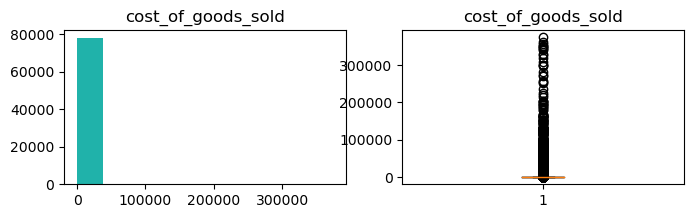

count     78682.000000
mean       1594.529029
std        8930.484664
min        -366.645000
25%          17.038250
50%         103.661000
75%         634.548000
max      374623.000000
Name: cost_of_goods_sold, dtype: float64
______________________________________________________________________________________


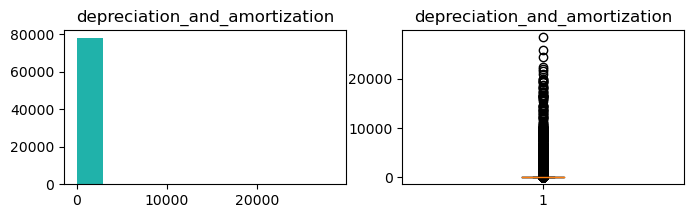

count    78682.000000
mean       121.234256
std        652.376804
min          0.000000
25%          1.192000
50%          7.929500
75%         47.971750
max      28430.000000
Name: depreciation_and_amortization, dtype: float64
______________________________________________________________________________________


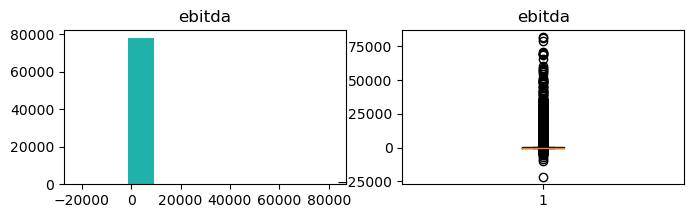

count    78682.000000
mean       376.759424
std       2012.023142
min     -21913.000000
25%         -0.811000
50%         15.034500
75%        139.655250
max      81730.000000
Name: ebitda, dtype: float64
______________________________________________________________________________________


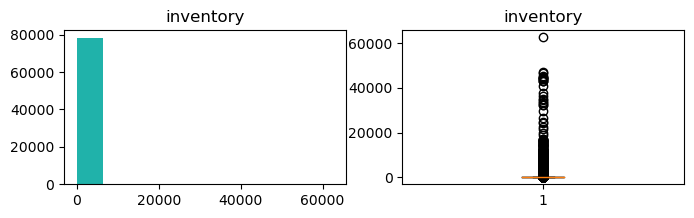

count    78682.000000
mean       201.605717
std       1060.766096
min          0.000000
25%          0.000000
50%          7.023000
75%         74.747250
max      62567.000000
Name: inventory, dtype: float64
______________________________________________________________________________________


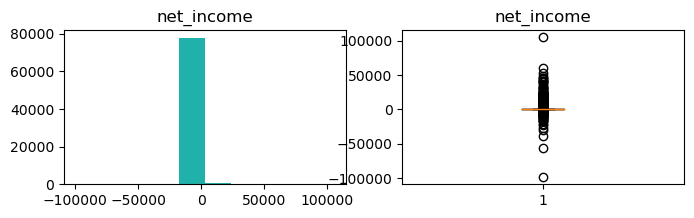

count     78682.000000
mean        129.382453
std        1265.532022
min      -98696.000000
25%          -7.415750
50%           1.616000
75%          40.144250
max      104821.000000
Name: net_income, dtype: float64
______________________________________________________________________________________


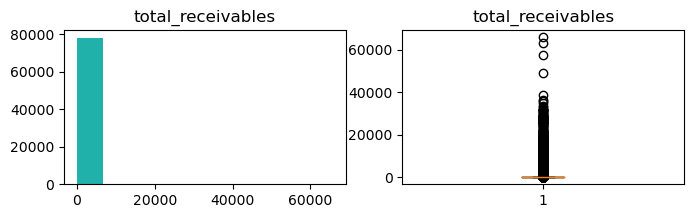

count    78682.000000
mean       286.832743
std       1335.978571
min         -0.006000
25%          3.281250
50%         22.820000
75%        131.580500
max      65812.000000
Name: total_receivables, dtype: float64
______________________________________________________________________________________


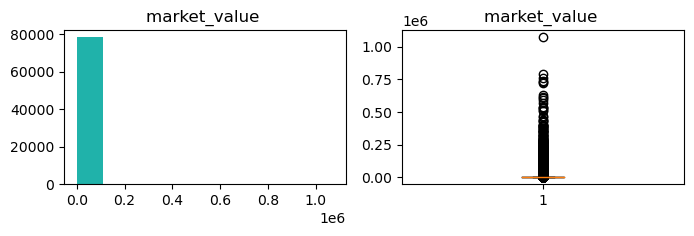

count    7.868200e+04
mean     3.414355e+03
std      1.841410e+04
min      1.000000e-04
25%      3.498000e+01
50%      2.275118e+02
75%      1.244890e+03
max      1.073391e+06
Name: market_value , dtype: float64
______________________________________________________________________________________


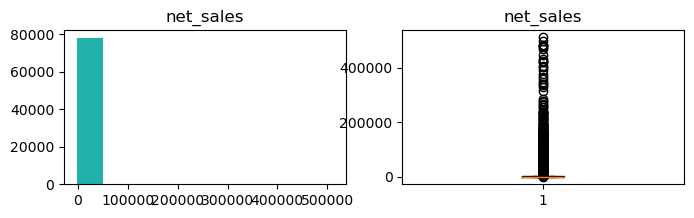

count     78682.000000
mean       2364.019706
std       11950.068842
min       -1964.999000
25%          27.548500
50%         186.598500
75%        1046.402500
max      511729.000000
Name: net_sales, dtype: float64
______________________________________________________________________________________


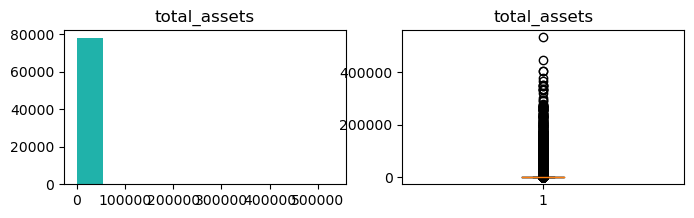

count     78682.000000
mean       2867.110620
std       12917.944421
min           0.001000
25%          37.363500
50%         213.203500
75%        1171.364750
max      531864.000000
Name: total_assets, dtype: float64
______________________________________________________________________________________


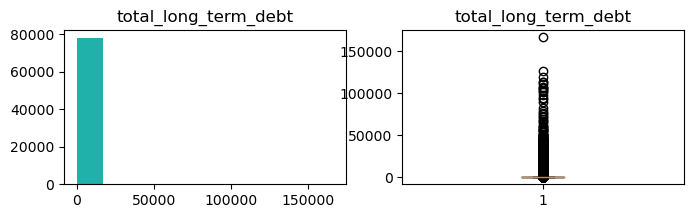

count     78682.000000
mean        722.483710
std        3242.170946
min          -0.023000
25%           0.000000
50%           7.593500
75%         248.760750
max      166250.000000
Name: total_long_term_debt, dtype: float64
______________________________________________________________________________________


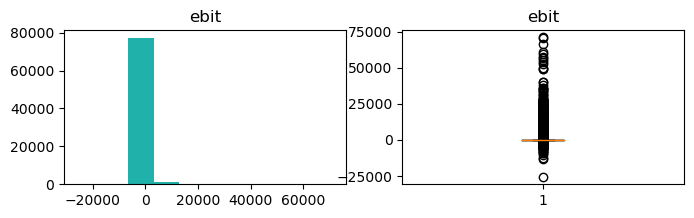

count    78682.000000
mean       255.525035
std       1494.643534
min     -25913.000000
25%         -2.787000
50%          6.518000
75%         87.599000
max      71230.000000
Name: ebit, dtype: float64
______________________________________________________________________________________


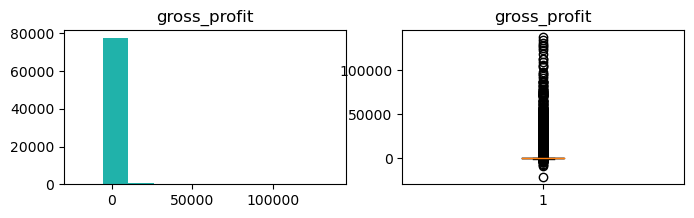

count     78682.000000
mean        769.490783
std        3774.703114
min      -21536.000000
25%           8.521250
50%          63.581500
75%         344.074250
max      137106.000000
Name: gross_profit, dtype: float64
______________________________________________________________________________________


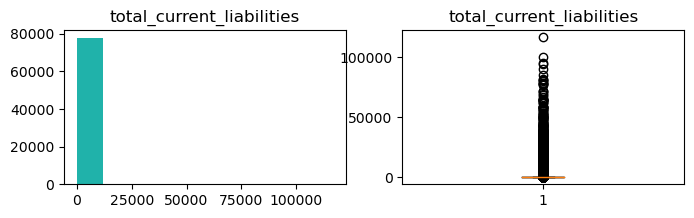

count     78682.000000
mean        610.072255
std        2938.387443
min           0.001000
25%           8.889250
50%          43.333000
75%         222.817000
max      116866.000000
Name: total_current_liabilities, dtype: float64
______________________________________________________________________________________


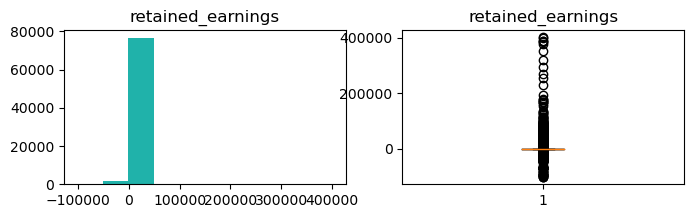

count     78682.000000
mean        532.467069
std        6369.159440
min     -102362.000000
25%         -68.282750
50%          -1.131000
75%         146.070000
max      402089.000000
Name: retained_earnings, dtype: float64
______________________________________________________________________________________


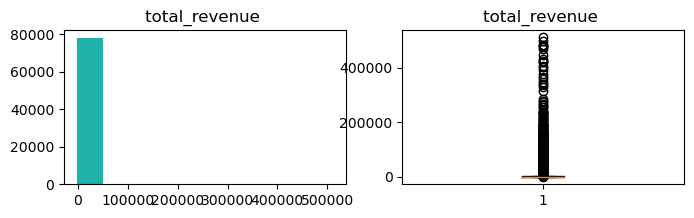

count     78682.000000
mean       2364.019706
std       11950.068842
min       -1964.999000
25%          27.548500
50%         186.598500
75%        1046.402500
max      511729.000000
Name: total_revenue , dtype: float64
______________________________________________________________________________________


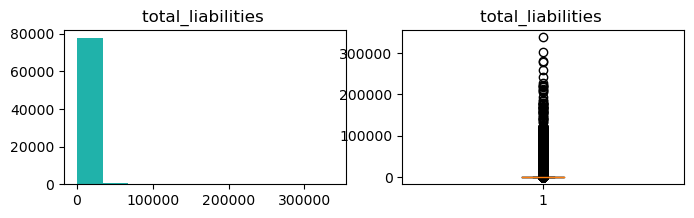

count     78682.000000
mean       1773.563963
std        8053.684902
min           0.001000
25%          13.486000
50%          81.988000
75%         629.975000
max      337980.000000
Name: total_liabilities , dtype: float64
______________________________________________________________________________________


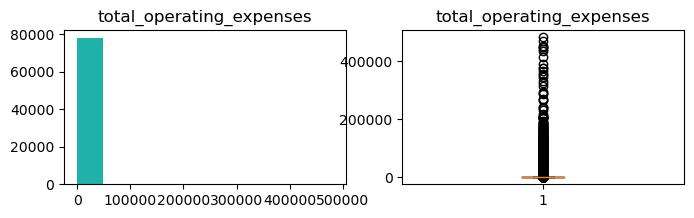

count     78682.000000
mean       1987.260307
std       10419.629038
min        -317.197000
25%          32.872500
50%         168.912000
75%         875.522250
max      481580.000000
Name: total_operating_expenses, dtype: float64


In [25]:
e.explore_univariate(df, object_cols, num_cols)

In [29]:
df[object_cols]

,company_name
0,C_1
1,C_1
2,C_1
3,C_1
4,C_1
...,...
78677,C_8971
78678,C_8971
78679,C_8971
78680,C_8971


In [31]:
object_cols

['company_name']

In [35]:
e.explore_bivariate(tr, target, "", num_cols)

TypeError: 'NoneType' object is not iterable

In [ ]:
for ncol in num_cols:
    e.explore_bivariate_quant(tr, target, ncol)

status_label 
____________________



/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 99.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


In [ ]:
e.explore_multivariate(tr, target, object_cols, num_cols)

## Question 1: Is "x" associated with "y"?

### Analyze "x" vs "y" with stats

### Summarize

## Question 2: Is "a" associated with "b"?

### Analyze "a" vs "b" with stats

### Summarize

## Question 3: Is 'c' associated with 'd'?

### Analyze "a" vs "b" with stats

### Summarize

## Question 4: Is 'c' associated with 'd'?

### Analyze "a" vs "b" with stats

### Summarize

### Exploration Summary
-
-
-

### (As Required) Features I am moving to modeling with
1.
2.
3.
4.

or NONE

## Modeling

* Evaluation Metrics (example: I will use R^2 and Root Mean Square Error (RMSE) as my evaluation metrics)
    * for R^2, the value is in the range 0-1; closer to 1.0 is better; baseline is 0.0
    * for RMSE, the lower the value the better; baseline is xxx
* The average target is xxx which is the baseline prediction
* I will evaluate x different model types and various hyperparameter configurations
    * (Example: The four model types are Ordinary Least Squares (OLS), LassoLars, Polynomial Regression, Generalized Linear Model (GLM))
* Models will be evaluated on train and validate data
* The model that performs the best will then be evaluated on test

In [ ]:
rmse, r2 = m.metrics_reg(y_tr, yhat)

In [ ]:
top_k_rfe, X_tr_rfe, X_val_rfe = m.rfe(X_tr, X_val, y_tr, k=3)

In [ ]:
top_k = m.select_kbest(X_tr, y_tr,k=18)

### Comparing Models

In [ ]:
metrics_df, pred_lr_rfe_tr, pred_lr_tr, pred_lars_tr, pred_pr_tr, pred_glm_tr = m.get_models_dataframe(baseline, tr, y_tr, y_val, y_ts, X_tr_sc, X_val_sc, X_ts_sc)

### Comparing Models Summary
* summarize the model performance
* ...
* I have chosen to move forward with the ___ model on test

### Best Model (model name) on Test

In [ ]:
result = m.test_best_model(X_ts_sc, y_ts, X_tr_sc, y_tr)

### Predictions Graphs

In [ ]:
m.predict_vs_actual_graph(baseline, y_tr, pred_lr_tr, pred_pr_tr, pred_glm_tr)

In [ ]:
m.residual_scatter(y_tr, pred_lr_tr, pred_pr_tr, pred_glm_tr)

In [ ]:
m.distribution_actual_vs_predict(y_tr, pred_lr_tr, pred_pr_tr, pred_glm_tr)

## Modeling Summary

## Conclusions

### Exploration
-
-

### Modeling
-
-

### Recommendations
-
-

# Next Steps
-
-